In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
train, test = pd.read_csv("data/original/train.csv"), pd.read_csv("data/original/test.csv")
data = pd.concat([train, test]).set_index("PassengerId").reset_index()

After many attempts, feature engineering with filling in $Age$ always results in models less than 80% accuracy, which is probably due to the simple prediction methods we have used. (median/mode) We decided to join training and testing data for more data entries as well as more generality in the models. To kick off, we needed to do some basic feature engineerings.

In [3]:
data.Embarked.fillna(train.Embarked.dropna().max(), inplace=True)
data.drop(["Cabin"], axis=1, inplace=True)

In [4]:
data["tmp"] = data["Fare"]
def ftmp(r):
    if r.tmp == 0:
        r.tmp = np.NaN
    return r
data = data.apply(ftmp, axis=1)
data["NFare"] = data["tmp"] / data.groupby("Ticket")["Ticket"].transform("count")
data.drop(["tmp"], axis=1, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NFare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.250000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,8.050000
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,36.300000
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,7.250000
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,8.050000


From previous IDA, we learnt that females and children are more likely to survive, so we decided to create a feature called $Label$ to differentiate among "men", "women" and "children".

In [5]:
def label(r):
    if "Master" in str(r.Name):
        return "children"
    elif r.Sex == "male":
        return "men"
    elif r.Sex == "female":
        return "women"
data["Label"] = data.apply(label, axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NFare,Label
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.250000,men
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,35.641650,women
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.925000,women
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,26.550000,women
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.050000,men
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,8.050000,men
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,36.300000,women
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,7.250000,men
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,8.050000,men


Similarly, we created a feature called $Surname$ in order to group passengers with the same last name.

In [6]:
def surname(r):
    return r.Name.split(",")[0]
data["Surname"] = data.apply(surname, axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NFare,Label,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.250000,men,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,35.641650,women,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.925000,women,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,26.550000,women,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.050000,men,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,8.050000,men,Spector
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,36.300000,women,Oliva y Ocana
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,7.250000,men,Saether
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,8.050000,men,Ware


Created a feature called $FTicket$ to denote possible group-able tickets with $Pclass$, $Ticket$, $Fare$ and $Embarked$, since these features can grasp important messages about the passenger groups who bought the tickets in the same class and same departure places. In the previous IDA, we explored the $Ticket$, thinking maybe a certain part of it can be repeated, which makes it easier to do grouping, so we finalized on using the [:-1] portion in Ticket.

In [7]:
def fticket(r):
    return f"{str(r.Pclass)}-{str(r.Ticket)[:-1]}-{str(r.Fare)}-{str(r.Embarked)}"
data["FTicket"] = data.apply(fticket, axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NFare,Label,Surname,FTicket
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.250000,men,Braund,3-A/5 2117-7.25-S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,35.641650,women,Cumings,1-PC 1759-71.2833-C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.925000,women,Heikkinen,3-STON/O2. 310128-7.925-S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,26.550000,women,Futrelle,1-11380-53.1-S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.050000,men,Allen,3-37345-8.05-S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,8.050000,men,Spector,3-A.5. 323-8.05-S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,36.300000,women,Oliva y Ocana,1-PC 1775-108.9-C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,7.250000,men,Saether,3-SOTON/O.Q. 310126-7.25-S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,8.050000,men,Ware,3-35930-8.05-S


Used the $Surname$ and $FTicket$, we created a feature $Group$.

In [8]:
def group(r):
    return f"{str(r.Surname)}-{str(r.FTicket)}"
data["Group"] = data.apply(group, axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NFare,Label,Surname,FTicket,Group
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.250000,men,Braund,3-A/5 2117-7.25-S,Braund-3-A/5 2117-7.25-S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,35.641650,women,Cumings,1-PC 1759-71.2833-C,Cumings-1-PC 1759-71.2833-C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.925000,women,Heikkinen,3-STON/O2. 310128-7.925-S,Heikkinen-3-STON/O2. 310128-7.925-S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,26.550000,women,Futrelle,1-11380-53.1-S,Futrelle-1-11380-53.1-S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.050000,men,Allen,3-37345-8.05-S,Allen-3-37345-8.05-S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,8.050000,men,Spector,3-A.5. 323-8.05-S,Spector-3-A.5. 323-8.05-S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,36.300000,women,Oliva y Ocana,1-PC 1775-108.9-C,Oliva y Ocana-1-PC 1775-108.9-C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,7.250000,men,Saether,3-SOTON/O.Q. 310126-7.25-S,Saether-3-SOTON/O.Q. 310126-7.25-S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,8.050000,men,Ware,3-35930-8.05-S,Ware-3-35930-8.05-S


Since male passengers have more mortality rate overall, it will be a good idea to start do the grouping with female and children passengers. To start exploring data, we had to add a feature $WCNum$, the number of women and children in the group, to passengers with $Label$ other than "men". Also, there is no need to assign passengers traveling alone to an individual group, so set their groups, along with men's, to default.

In [9]:
cnt = []
data.loc[data["Label"] == "men", "Group"] = "None"
data["WCNum"] = data.query("Label != 'men'").groupby("Group")["Group"].transform("count")
data.loc[data["WCNum"] < 2, "Group"] = "None"
for i in np.arange(len(data)):
    if (data.loc[i, "Group"] == "None") & (data.loc[i, "Label"] != "men"):
        tmp = data.loc[(data["Label"] != "men") & (data["FTicket"] == data.loc[i, "FTicket"]), "Group"].iloc[0]
        data.loc[i, "Group"] = tmp
        if data.loc[i, "Group"] != "None":
            cnt.append(i)

In [10]:
data.Group.unique()

array(['None', 'Palsson-3-34990-21.075-S', 'Johnson-3-34774-11.1333-S',
       'Sandstrom-3-PP 954-16.7-S', 'Rice-3-38265-29.125-Q',
       'Vander Planke-3-34576-18.0-S', 'Asplund-3-34707-31.3875-S',
       'Nicola-Yarred-3-265-11.2417-C',
       'Laroche-2-SC/Paris 212-41.5792-C', 'Panula-3-310129-39.6875-S',
       'West-2-C.A. 3465-27.75-S', 'Goodwin-3-CA 214-46.9-S',
       'Skoog-3-34708-27.9-S', 'Moubarek-3-266-15.2458-C',
       'Caldwell-2-24873-29.0-S', 'Fortune-1-1995-263.0-S',
       'Doling-2-23191-23.0-S', 'Zabour-3-266-14.4542-C',
       'Jussila-3-413-9.825-S', 'Andersson-3-34708-31.275-S',
       'Peter-3-266-22.3583-C', 'Boulos-3-267-15.2458-C',
       'Ford-3-W./C. 660-34.375-S', 'Sage-3-CA. 234-69.55-S',
       'Watt-2-C.A. 3359-15.75-S', 'Goldsmith-3-36329-20.525-S',
       'Lefebre-3-413-25.4667-S', 'Becker-2-23013-39.0-S',
       'Kink-Heilmann-3-31515-22.025-S', 'Navratil-2-23008-26.0-S',
       'Strom-3-34705-10.4625-S', 'Newell-1-3527-113.275-C',
       'Colly

Looks like we have got 80 groups. Let's check one of them.

In [11]:
cols_1 = ["PassengerId", "Survived", "Name", "Label", "Group"]
data.loc[data["Group"] == "Palsson-3-34990-21.075-S", cols_1]

,PassengerId,Survived,Name,Label,Group
7,8,0.0,"Palsson, Master. Gosta Leonard",children,Palsson-3-34990-21.075-S
24,25,0.0,"Palsson, Miss. Torborg Danira",women,Palsson-3-34990-21.075-S
374,375,0.0,"Palsson, Miss. Stina Viola",women,Palsson-3-34990-21.075-S
567,568,0.0,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",women,Palsson-3-34990-21.075-S
1280,1281,NaN,"Palsson, Master. Paul Folke",children,Palsson-3-34990-21.075-S


They all share the same last name, passenger class, ticket id, fare as well as boarding place. I am convinced that they belong to the same family. And observe that even though the last passenger is in the testing dataset, with other family members passed away in the incident, it's quite convincing to predict $Survived$ as 0. Let's understand the groups in a clear way.

In [12]:
print(f"""
{len(data.Group.unique()) - 1} groups with
{data.loc[data["Group"] != "None", "Label"].value_counts()[0]} women and {data.loc[data["Group"] != "None", "Label"].value_counts()[1]} children
""")


80 groups with
171 women and 59 children



Calculated and visualized the survival rates across these 80 groups. First created a feature $WCLive$ for passengers in groups.

In [13]:
data["WCLive"] = data.query("Label != 'men' and Group != 'None'").groupby("Group")["Survived"].transform("mean")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NFare,Label,Surname,FTicket,Group,WCNum,WCLive
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.250000,men,Braund,3-A/5 2117-7.25-S,None,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,35.641650,women,Cumings,1-PC 1759-71.2833-C,None,1.0,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.925000,women,Heikkinen,3-STON/O2. 310128-7.925-S,None,1.0,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,26.550000,women,Futrelle,1-11380-53.1-S,None,1.0,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.050000,men,Allen,3-37345-8.05-S,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,8.050000,men,Spector,3-A.5. 323-8.05-S,None,NaN,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,36.300000,women,Oliva y Ocana,1-PC 1775-108.9-C,None,1.0,NaN
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,7.250000,men,Saether,3-SOTON/O.Q. 310126-7.25-S,None,NaN,NaN
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,8.050000,men,Ware,3-35930-8.05-S,None,NaN,NaN


In [14]:
cols_2 = ["PassengerId", "Name", "Label", "Group", "Survived", "WCLive"]
data.loc[data["Group"] == "Palsson-3-34990-21.075-S", cols_2]

,PassengerId,Name,Label,Group,Survived,WCLive
7,8,"Palsson, Master. Gosta Leonard",children,Palsson-3-34990-21.075-S,0.0,0.0
24,25,"Palsson, Miss. Torborg Danira",women,Palsson-3-34990-21.075-S,0.0,0.0
374,375,"Palsson, Miss. Stina Viola",women,Palsson-3-34990-21.075-S,0.0,0.0
567,568,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",women,Palsson-3-34990-21.075-S,0.0,0.0
1280,1281,"Palsson, Master. Paul Folke",children,Palsson-3-34990-21.075-S,NaN,0.0


This further confirmed our prediction on how the unknown passenger's $Survived$ being 0. Let's find groups whose $WCLive$ does not equal to 0 or 1 (meaning all lived or dead).

In [15]:
data["WCLive"].unique()

array([ nan, 0.  , 1.  , 0.75, 0.5 ])

In [16]:
print(f"""
Survival rates across 80 groups:
{data["WCLive"].value_counts().to_string()}
""")


Survival rates across 80 groups:
1.00    134
0.00     76
0.75      6
0.50      5



There are 11 entries with survival rates being 0.5 or 0.75, which needs more information to predict the $Survived$ if these passengers are in the testing dataset. It would also be helpful to check if there are groups only appeared in testing dataset, in that we need to perform further analysis to predict those.

In [17]:
test_unique_groups = set(data[891:].Group.unique()) - set(data[:891].Group.unique())
data.loc[data["Group"].isin(test_unique_groups), cols_2].sort_values(by="Group")

,PassengerId,Name,Label,Group,Survived,WCLive
1259,1260,"Gibson, Mrs. Leonard (Pauline C Boeson)",women,Gibson-1-11237-59.4-C,NaN,NaN
1293,1294,"Gibson, Miss. Dorothy Winifred",women,Gibson-1-11237-59.4-C,NaN,NaN
1044,1045,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",women,Klasen-3-35040-12.1833-S,NaN,NaN
1154,1155,"Klasen, Miss. Gertrud Emilia",women,Klasen-3-35040-12.1833-S,NaN,NaN
1050,1051,"Peacock, Mrs. Benjamin (Edith Nile)",women,Peacock-3-SOTON/O.Q. 310131-13.775-S,NaN,NaN
1172,1173,"Peacock, Master. Alfred Edward",children,Peacock-3-SOTON/O.Q. 310131-13.775-S,NaN,NaN
1300,1301,"Peacock, Miss. Treasteall",women,Peacock-3-SOTON/O.Q. 310131-13.775-S,NaN,NaN
1083,1084,"van Billiard, Master. Walter John",children,van Billiard-3-A/5. 85-14.5-S,NaN,NaN
1235,1236,"van Billiard, Master. James William",children,van Billiard-3-A/5. 85-14.5-S,NaN,NaN


Gibson, Klasen, Peacock and van Billiard families are all in testing datasets. Then use possible features like $Fare$, $Pclass$ and $Embarked$ to predict their $Survived$.

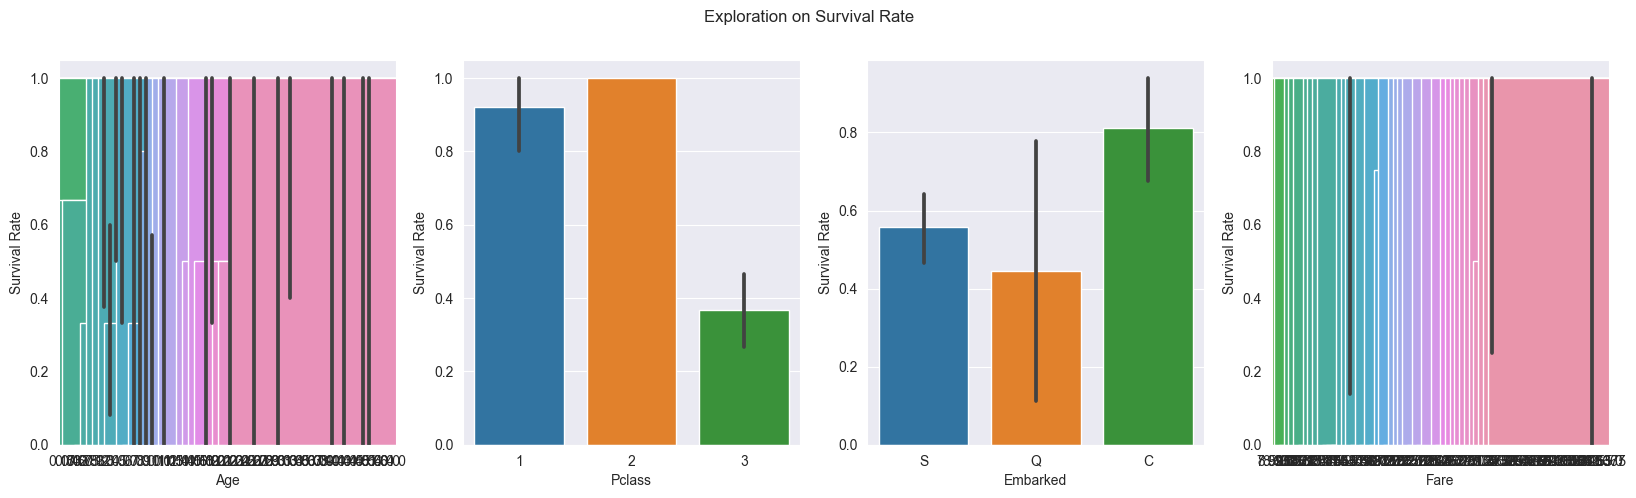

In [18]:
_, ax = plt.subplots(1, 4, figsize=[20, 5])
plt.suptitle("Exploration on Survival Rate")
sns.barplot(data=data.query("Group != 'None'"), x="Age", y="Survived", ax=ax[0], width=50).set_ylabel("Survival Rate")
sns.barplot(data=data.query("Group != 'None'"), x="Pclass", y="Survived", ax=ax[1]).set_ylabel("Survival Rate")
sns.barplot(data=data.query("Group != 'None'"), x="Embarked", y="Survived", ax=ax[2]).set_ylabel("Survival Rate")
sns.barplot(data=data.query("Group != 'None'"), x="Fare", y="Survived", ax=ax[3], width=50).set_ylabel("Survival Rate")
plt.show()

Of the four features we used, $Pclass$ and $Embarked$ produced desirable results. Especially for $Pclass$, it's obvious that 3rd class passengers have a way larger chance to die (less than 40% of survival) while the rest two classes have more than 90% survival rate. Applied these findings to the unique groups in testing dataset.

In [19]:
data.loc[(data.Group.isin(test_unique_groups)) & (data["Pclass"] != 3), "WCLive"] = 1
data.loc[(data.Group.isin(test_unique_groups)) & (data["Pclass"] == 3), "WCLive"] = 0
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NFare,Label,Surname,FTicket,Group,WCNum,WCLive
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.250000,men,Braund,3-A/5 2117-7.25-S,None,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,35.641650,women,Cumings,1-PC 1759-71.2833-C,None,1.0,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.925000,women,Heikkinen,3-STON/O2. 310128-7.925-S,None,1.0,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,26.550000,women,Futrelle,1-11380-53.1-S,None,1.0,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.050000,men,Allen,3-37345-8.05-S,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,8.050000,men,Spector,3-A.5. 323-8.05-S,None,NaN,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,36.300000,women,Oliva y Ocana,1-PC 1775-108.9-C,None,1.0,NaN
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,7.250000,men,Saether,3-SOTON/O.Q. 310126-7.25-S,None,NaN,NaN
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,8.050000,men,Ware,3-35930-8.05-S,None,NaN,NaN


Summarize the conclusion from the above feature engineering:
1. women and children are more likely to survive.
2. the women and children are more likely to die if the survival rates of their groups is less than 0.5.

In [20]:
data.loc[891:, "Predict"] = 0
data.loc[891:, "Predict"][data["Sex"] == "female"] = 1
data.loc[891:, "Predict"][(data["Sex"] == "female") & (data["WCLive"] == 0)] = 0
data.loc[891:, "Predict"][(data["Label"] == "children") & (data["WCLive"] == 1)] = 1
data[891:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NFare,Label,Surname,FTicket,Group,WCNum,WCLive,Predict
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,7.829200,men,Kelly,3-33091-7.8292-Q,None,NaN,NaN,0.0
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,7.000000,women,Wilkes,3-36327-7.0-S,None,1.0,NaN,1.0
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,9.687500,men,Myles,2-24027-9.6875-Q,None,NaN,NaN,0.0
894,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,8.662500,men,Wirz,3-31515-8.6625-S,None,NaN,NaN,0.0
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,6.143750,women,Hirvonen,3-310129-12.2875-S,Hirvonen-3-310129-12.2875-S,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,8.050000,men,Spector,3-A.5. 323-8.05-S,None,NaN,NaN,0.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,36.300000,women,Oliva y Ocana,1-PC 1775-108.9-C,None,1.0,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,7.250000,men,Saether,3-SOTON/O.Q. 310126-7.25-S,None,NaN,NaN,0.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,8.050000,men,Ware,3-35930-8.05-S,None,NaN,NaN,0.0


Finished the groupings.

In [21]:
data.to_csv("data/clean/data.csv")